<a href="https://colab.research.google.com/github/b-vaibhaw/Linear-Regression-ML/blob/main/LinearRegression(1_stock).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Prediction using Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/1000_cryptos.csv")

In [ ]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,0,2023-06-13,0.200132,0.202672,0.197668,0.199337,0.199337,246568.0,BTC-USD
1,1,2023-06-14,0.199333,0.202175,0.195464,0.196212,0.196212,175274.0,BTC-USD
2,2,2023-06-15,0.196201,0.199728,0.195101,0.198773,0.198773,114070.0,BTC-USD
3,3,2023-06-16,0.198772,0.205611,0.196799,0.202320,0.202320,210979.0,BTC-USD
4,4,2023-06-17,0.202321,0.206999,0.201455,0.206174,0.206174,76649.0,BTC-USD


In [ ]:
data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
741030,741030,2023-01-27,7.174019,7.473317,6.999093,7.371270,7.371270,409716317.0,POLIS11213-USD
741031,741031,2023-01-28,7.371504,7.483155,7.149632,7.207573,7.207573,247360344.0,POLIS11213-USD
741032,741032,2023-01-29,7.207568,7.449573,7.165031,7.387718,7.387718,311604961.0,POLIS11213-USD
741033,741033,2023-01-30,7.387610,7.418731,6.828748,6.906292,6.906292,308344397.0,POLIS11213-USD
741034,741034,2023-01-31,6.907165,7.058965,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741035 entries, 0 to 741034
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  741035 non-null  int64  
 1   Date        741035 non-null  object 
 2   Open        734168 non-null  float64
 3   High        734168 non-null  float64
 4   Low         734167 non-null  float64
 5   Close       734167 non-null  float64
 6   Adj Close   734167 non-null  float64
 7   Volume      734167 non-null  float64
 8   Symbol      741034 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 50.9+ MB


In [ ]:
data.isnull().sum()

Unnamed: 0       0
Date             0
Open          6867
High          6867
Low           6868
Close         6868
Adj Close     6868
Volume        6868
Symbol           1
dtype: int64

In [ ]:
data = data.dropna(subset=['Open','High','Low','Close','Adj Close','Volume','Symbol'])

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,734167.000000,734167.000000,734167.000000,734167.000000,734167.000000,7.341670e+05
mean,380.162163,390.813371,370.150986,380.601007,380.601007,5.575702e+08
std,3650.286780,3757.612297,3560.039728,3654.607187,3654.607187,1.331530e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.043546,0.045955,0.041458,0.043542,0.043542,5.453870e+05
50%,0.371924,0.391661,0.353642,0.371775,0.371775,3.363380e+06
75%,2.465301,2.603474,2.340369,2.464567,2.464567,2.049114e+07
max,73461.031250,236493.171875,72216.585938,73461.031250,73461.031250,8.325207e+13


<Axes: >

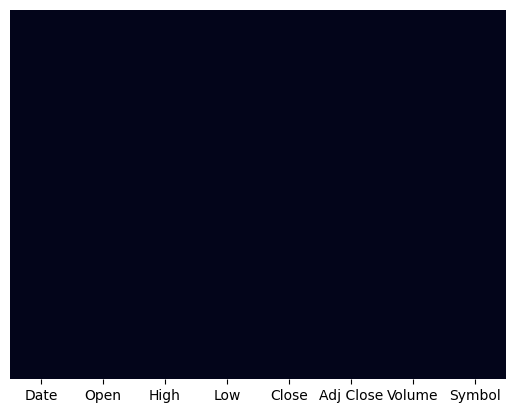

In [ ]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [ ]:
data = data.drop('Date', axis=1)

<Axes: ylabel='Close'>

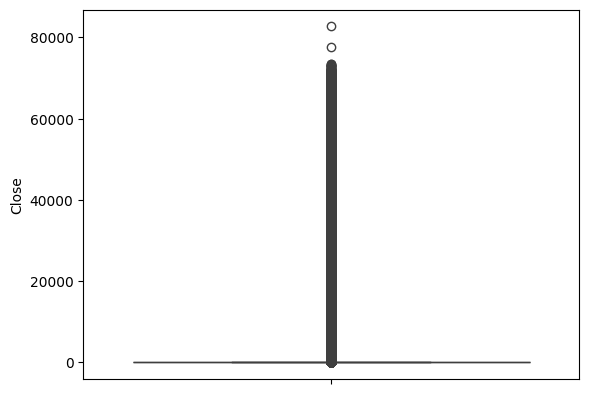

In [ ]:
sns.boxplot(data['Close'])

<Axes: ylabel='Open'>

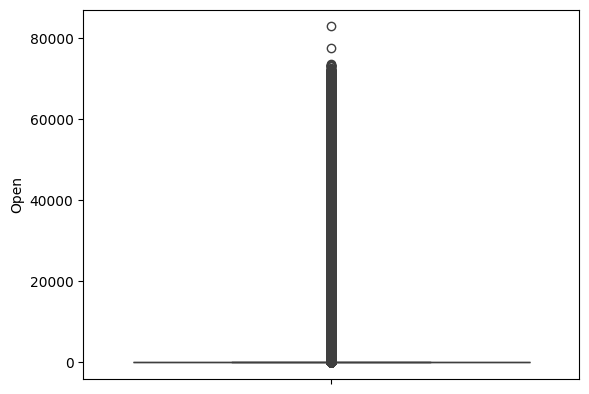

In [ ]:
sns.boxplot(data["Open"])

In [ ]:
data = data.drop('Symbol', axis=1)

<Axes: >

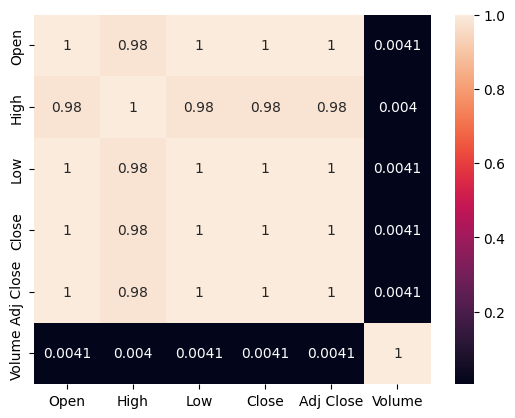

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:

#SIMPLE LINEAR REGRESSION
X_1=data[["High"]]
Y_1=data["Adj Close"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_1,Y_1,test_size=0.39,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
slm = LinearRegression(fit_intercept = True)

In [ ]:
slm.fit(X_train_1,Y_train_1)

LinearRegression()

In [ ]:
slm.coef_

array([0.96934784])

In [ ]:
slm.intercept_

1.421321787291788

In [ ]:
y_1_pred = slm.predict(X_test_1)

In [ ]:
y_1_pred

array([ 3.07905006, 23.02787384,  1.54683488, ...,  1.48532686,
        1.65248701,  1.49270941])

<Axes: xlabel='Adj Close'>

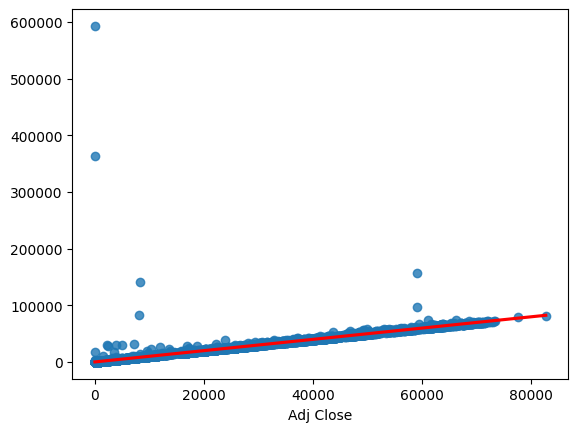

In [ ]:
sns.regplot(x=Y_test_1, y=y_1_pred, line_kws={'color':'red'}, ci=None)